# **Voorspellen van huisprijzen**

|Teamleden|Kaggle Username|GitHub Username|
|--|--|--|
|Nima Ghafar|||
|Busse Heemskerk|bussejheemskerk|BJHeemskerk|
|Henry Lau|||
|Jesse van Leeuwen|||


In [18]:
# Importing standard libaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from PIL import Image

# Importeren DL libaries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

In [3]:
# Inladen van csv bestanden
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

# Tonen van de data
display(train_data.head(), test_data.head())

,House ID,Bedrooms,Bathrooms,Area,Latitude,Longitude,Price
0,1,4,4.0,4053,33.6968,-111.8892,869500
1,2,4,3.0,3343,34.8280,-119.0349,865200
2,3,3,4.0,3923,33.7669,-111.9182,889000
3,4,5,5.0,4022,33.7752,-111.7791,910000
4,5,3,4.0,4116,33.7669,-111.9182,971226


,House ID,Bedrooms,Bathrooms,Area,Latitude,Longitude
0,501,3,2.0,2330,35.6406,-120.7003
1,502,3,2.5,1339,35.6406,-120.7003
2,503,3,2.0,1472,35.6406,-120.7003
3,504,4,4.0,2681,35.6406,-120.7003
4,505,3,2.5,1935,33.8085,-117.9228


In [13]:
# Aanmaken van te vullen lijsten
file_paths_tr = []
imgdata_tr = []
file_paths_te = []
imgdata_te = []

# Opzetten directories
directories = ["train/", "test/"]

# Ophalen van de bestanden
for directory in directories:
    for file in os.listdir(directory):
        if file.endswith(".jpg"):
            file_path = os.path.join(directory, file)
                
            img = Image.open(file_path)
            img_array = np.array(img)

            # Ophalen numerieke gedeelte beastand
            file_number = ''.join(filter(str.isdigit, file))

            # Vullen van juiste lijst
            if file_number and int(file_number) > 500:
                file_paths_te.append(file_path)
                imgdata_te.append(img_array)
            else:
                file_paths_tr.append(file_path)
                imgdata_tr.append(img_array)


In [16]:
# Initieren van het dataframe
train_images = pd.DataFrame(columns=["House ID", "FilePath", "ImgData"])
test_images = pd.DataFrame(columns=["House ID", "FilePath", "ImgData"])

# Aanvullen train dataset
train_images["House ID"] = train_data["House ID"]
train_images["FilePath"] = file_paths_tr
train_images["ImgData"] = imgdata_tr

# Aanvullen test dataset
test_images["House ID"] = test_data["House ID"]
test_images["FilePath"] = file_paths_te
test_images["ImgData"] = imgdata_te

# Tonen van de dataframes
display(train_images.head(), test_images.head())

,House ID,FilePath,ImgData
0,1,train/1.jpg,"[[[156, 126, 98], [164, 137, 110], [180, 154, ..."
1,2,train/10.jpg,"[[[217, 203, 174], [210, 196, 167], [202, 188,..."
2,3,train/100.jpg,"[[[159, 147, 131], [160, 148, 132], [160, 148,..."
3,4,train/101.jpg,"[[[170, 145, 105], [166, 141, 101], [174, 149,..."
4,5,train/102.jpg,"[[[170, 105, 37], [170, 105, 37], [170, 105, 3..."


,House ID,FilePath,ImgData
0,501,test/501.jpg,"[[[255, 253, 212], [255, 253, 214], [254, 252,..."
1,502,test/502.jpg,"[[[68, 46, 9], [69, 47, 10], [70, 47, 13], [71..."
2,503,test/503.jpg,"[[[94, 125, 128], [94, 125, 128], [94, 125, 12..."
3,504,test/504.jpg,"[[[30, 21, 16], [32, 23, 18], [34, 25, 20], [3..."
4,505,test/505.jpg,"[[[124, 123, 119], [105, 104, 100], [79, 78, 7..."


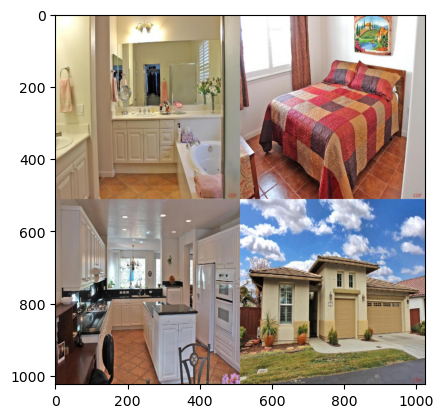

In [24]:
# Specify the path to your JPG file
image_path = test_images["FilePath"][0]

# Open the image file
img = Image.open(image_path)

# Convert the image to a NumPy array
img_array = np.array(img)

plt.imshow(img)

## EDA

## Fully Connencted Neural Network

## CNN

# Transfer Learning

# Multimodaal model